# Bank Customer Churn Analysis

### Analyse du taux de désabonnement des clients bancaires

[EN] In this project, we would like to udestand which factors contribute to customer and analyse it; to build predictive models to identify customers at risk of churning.

[FR] Dans ce projet, nous aimerions comprendre quels facteurs contribuent au client et l'analyser ; construire des modèles prédictifs pour identifier les clients à risque de résiliation.

[EN] The main goal for this project is to develop strategies that aim to improve customer retention and reduce customer churn.

[FR] L'objectif principal de ce projet est de développer des stratégies visant à améliorer la fidélisation de la clientèle et à réduire le taux de désabonnement.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank_data.csv')

In [3]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.shape

(10000, 12)

In [6]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


[EN] The next step is to look at the number of churns (1) and those who didn't churn (0).

[FR] L'étape suivante consiste à examiner le nombre de désabonnements (1) et ceux qui n'ont pas désabonné (0).

In [8]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

[EN] Let's remove the 'customers_id' column because it's not needed in our analysis.

[FR] Supprimons la colonne 'customers_id' car elle n'est pas nécessaire dans notre analyse.

In [9]:
df.drop(columns=['customer_id'], inplace=True)

## Exploratory Data Analysis (EDA)

[EN] Now let's move on to exploratory data analysis. So what do we want to know?

[FR] Passons maintenant à l'analyse exploratoire des données. Alors que voulons-nous savoir ?

<AxesSubplot:>

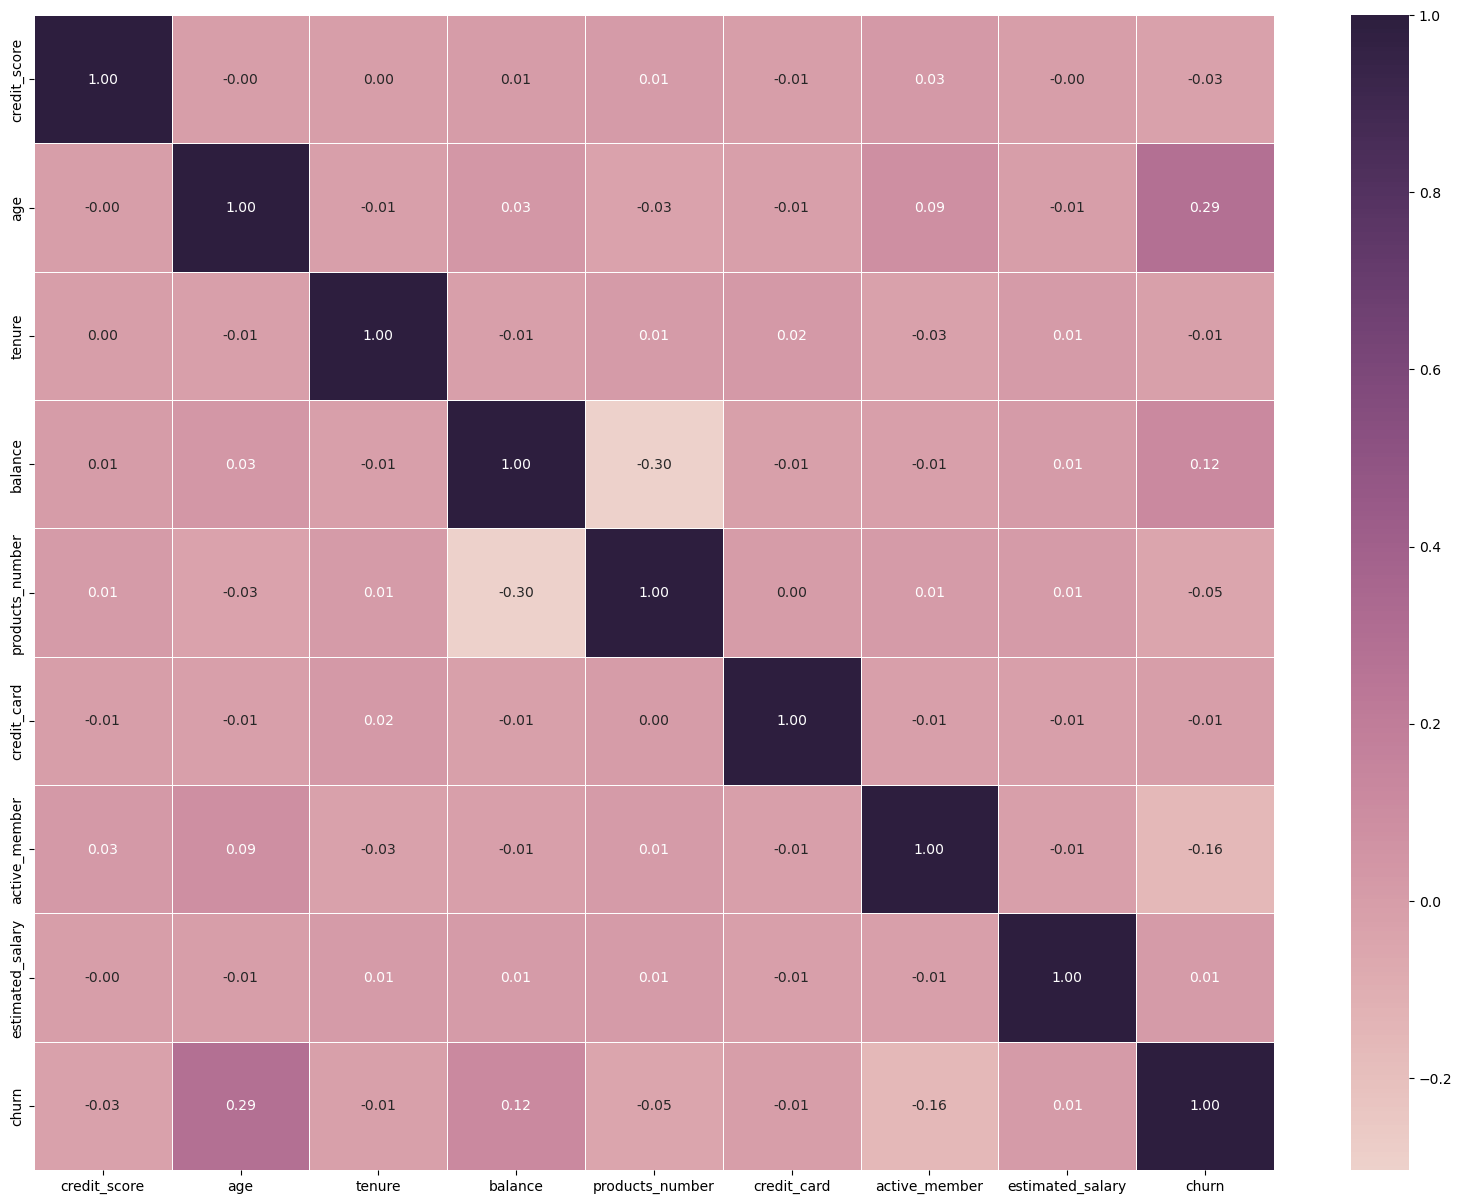

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.5, fmt='.2f')

In [11]:
# Getting the number of values for categorical values
for i in ['credit_card', 'active_member', 'products_number'] : 
    print(df[i].value_counts())

1    7055
0    2945
Name: credit_card, dtype: int64
1    5151
0    4849
Name: active_member, dtype: int64
1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64


In [12]:
# Convert them to object date type

for i in ['credit_card', 'active_member','products_number']:
        df[i] = df[i].astype('object')

In [13]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_theme(context = 'paper', style ='whitegrid', font= 'Georgia', 
              font_scale = 1.2)

1. We want to know how does tenure affect Churn

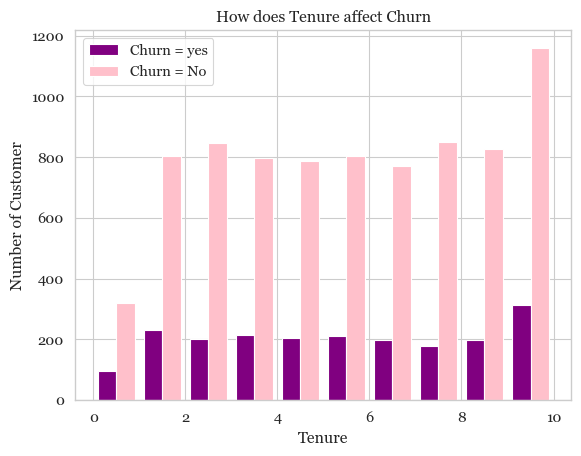

In [14]:
tenure_yes = df[df['churn'] == 1].tenure
tenure_no = df[df['churn'] == 0].tenure

plt.hist([tenure_yes, tenure_no], color=['purple', 'pink'], label=['Churn = yes', 'Churn = No'])
plt.legend()
plt.title('How does Tenure affect Churn')
plt.xlabel('Tenure')
plt.ylabel('Number of Customer')
plt.show()

[EN] In the plot above, we see the correlation between "position held" and "customer churn".
1. We see the largest number of churn customers in the column where the tenure  exceeds > 8 years;
2. The smallest number of churn customers refers to those customers whose tenure is from 0 to 1.
3. The largest number of customers who continued to use the services belong to the type of customers whose tenure is from 9 to 10 years.
4. The smallest number of customers who continued to use the services of the bank belong to the type of clients whose tenure is from 0 to 1.
5. Looking at the plot, it is impossible to say for sure that customers with more experience leave less or vice versa. Usually (according to data from the Internet), tenure affects the churn of customers, but in some cases (like ours), this is not the case.

[FR] Dans le graphique ci-dessus, nous voyons la corrélation entre "position détenue" et "attrition client".
1. Nous voyons le plus grand nombre de clients désabonnés dans la colonne où l'ancienneté dépasse > 8 ans ;
2. Le plus petit nombre de clients désabonnés fait référence aux clients dont l'ancienneté est comprise entre 0 et 1.
3. Le plus grand nombre de clients qui ont continué à utiliser les services appartiennent au type de clients dont l'ancienneté est de 9 à 10 ans.
4. Le plus petit nombre de clients qui ont continué à utiliser les services de la banque appartiennent au type de clients dont l'ancienneté est de 0 à 1.
5. En regardant l'intrigue, il est impossible de dire avec certitude que les clients ayant plus d'expérience partent moins ou vice versa. Habituellement (selon les données d'Internet), l'ancienneté affecte le taux de désabonnement des clients, mais dans certains cas (comme le nôtre), ce n'est pas le cas.

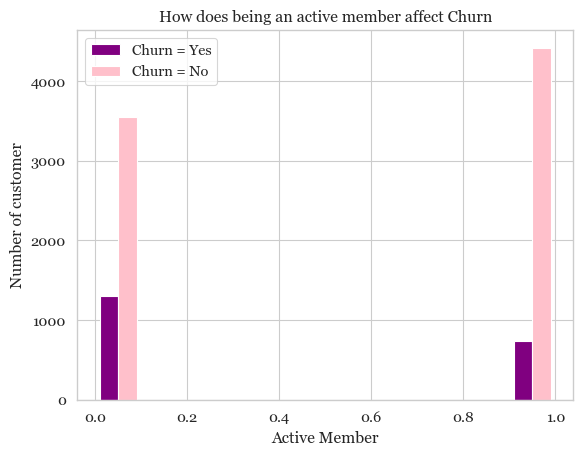

In [15]:
member_yes = df[df['churn'] == 1].active_member
member_no = df[df['churn'] == 0].active_member

plt.hist([member_yes,member_no], color =['purple','pink'], label=['Churn = Yes','Churn = No'])
plt.legend()
plt.title('How does being an active member affect Churn')
plt.xlabel('Active Member')
plt.ylabel('Number of customer')
plt.show()

[EN] Looking at this plot, we can say : 

* Customers who are active members of the company are more likely to resist churn (i.e. remain members of the company). 

It is worth noting that this may be true, since the bank provides benefits to clients who are active members more often.

[FR] En regardant ce tracé, on peut dire :

* Les clients qui sont des membres actifs de l'entreprise sont plus susceptibles de résister au désabonnement (c'est-à-dire de rester membres de l'entreprise).

Il convient de noter que cela peut être vrai, car la banque offre plus souvent des avantages aux clients qui sont des membres actifs.

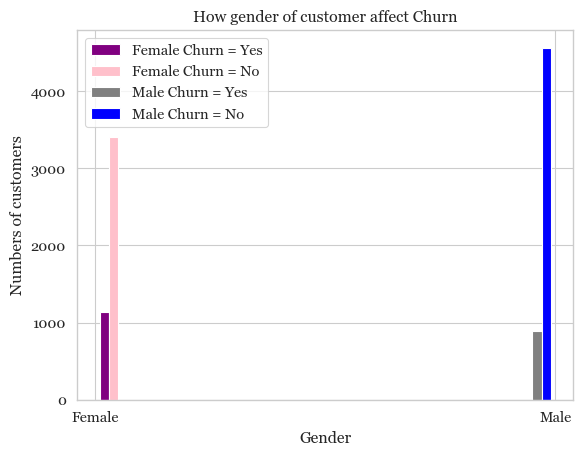

In [16]:
# How customer gender affects churn

female = df[df['gender'] == 'Female']
male = df[df['gender'] == 'Male']
female_yes = female[female['churn'] == 1].gender
female_no = female[female['churn'] == 0].gender
male_yes = male[male['churn'] == 1].gender
male_no = male[male['churn'] == 0].gender

plt.hist([female_yes, female_no, male_yes, male_no],
         color=['purple', 'pink', 'grey', 'blue'],
         label=['Female Churn = Yes', 'Female Churn = No',
                'Male Churn = Yes', 'Male Churn = No'])
plt.legend()
plt.title('How gender of customer affect Churn')
plt.xlabel('Gender')
plt.ylabel('Numbers of customers')
plt.show()

[EN] Looking at this plot, we can say :

* Female customers are more likely than male customers to churn (leave the bank more often)
* Male customers are less likely than female customers to churn (more often they continue to use the services of the bank); we see that more men do not churn.

* To explain this, we can say that factors such as gender preferences, life events, or market dynamics may contribute to the observed differences in churn rates between the sexes.
Anticipated strategy: improve conditions for feamle clients, prepare lucrative offers that will help retain female clients.

[FR] En regardant ce tracé, on peut dire :

* Les clientes sont plus susceptibles que les clients masculins de se désabonner (quittent la banque plus souvent)
* Les clients masculins sont moins susceptibles que les clientes de se désabonner (ils continuent plus souvent à utiliser les services de la banque) ; nous voyons que plus d'hommes ne barattent pas.

* Pour expliquer cela, nous pouvons dire que des facteurs tels que les préférences de genre, les événements de la vie ou la dynamique du marché peuvent contribuer aux différences observées dans les taux de désabonnement entre les sexes.
Stratégie anticipée : améliorer les conditions de la clientèle féminine, préparer des offres lucratives qui permettront de fidéliser la clientèle féminine.

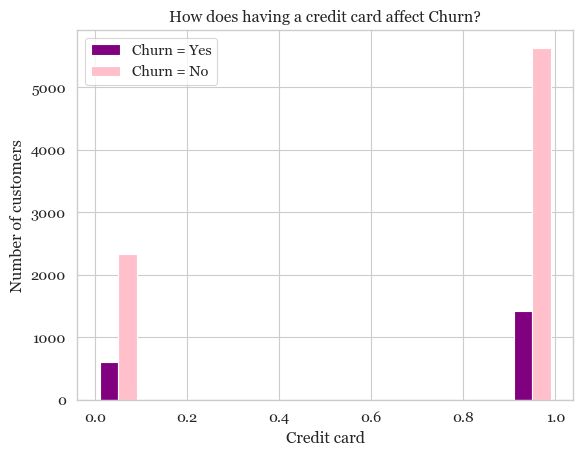

In [17]:
# credit cart

credit_card_yes = df[df['churn'] == 1].credit_card
credit_card_no = df[df['churn'] == 0].credit_card

plt.hist([credit_card_yes, credit_card_no], color = ['purple', 'pink'], label=['Churn = Yes', 'Churn = No'])
plt.legend()
plt.title('How does having a credit card affect Churn?')
plt.xlabel('Credit card')
plt.ylabel('Number of customers')
plt.show()

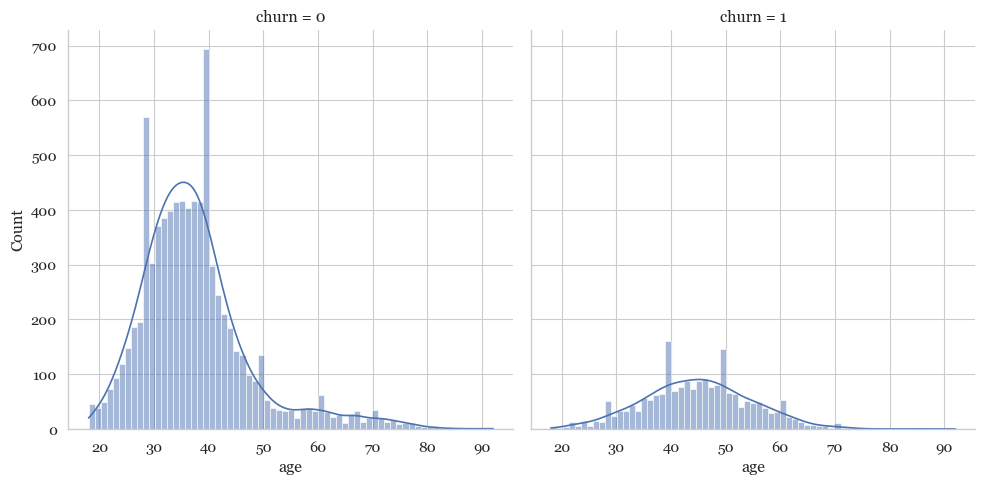

In [ ]:
# age

sns.displot(data=df, x="age", col="churn", kde=True)


[EN] On these plots we see:

* People in their 40s and 50s are the least likely to churn

Intended Strategy: Prepare lucrative offers for this age category.

[FR] Sur ces parcelles, nous voyons:

* Les personnes dans la quarantaine et la cinquantaine sont les moins susceptibles de se désabonner

Stratégie prévue : Préparez des offres lucratives pour cette catégorie d'âge.

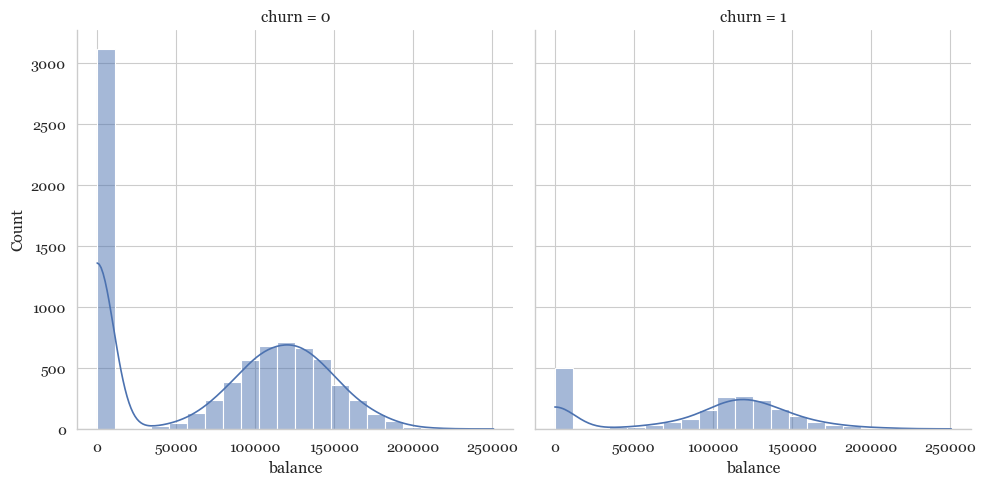

In [19]:
# balance

sns.displot(data=df, x="balance", col="churn", kde=True)

### Encoding categorical data

Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the models to give and improve the predictions.

* Get Dummies : One-hot encoding creates binary columns for each category, representing the presence or absence of a category.It is suitable for nominal variables with no inherent order, such as the "country" variable.

* Label Encoder : It assigns a unique numerical label to each category in the variable.It is suitable for variables with ordinal relationships, where the order of categories matters (e.g., low, medium, high).

[FR] L'encodage des données catégorielles est un processus de conversion des données catégorielles en format entier afin que les données avec des valeurs catégorielles converties puissent être fournies aux modèles pour donner et améliorer les prédictions.

* Get Dummies : l'encodage à chaud crée des colonnes binaires pour chaque catégorie, représentant la présence ou l'absence d'une catégorie. Il convient aux variables nominales sans ordre inhérent, telles que la variable "pays".

* Label Encoder : Il attribue une étiquette numérique unique à chaque catégorie de la variable. Il convient aux variables avec des relations ordinales, où l'ordre des catégories est important (par exemple, faible, moyen, élevé).

In [ ]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns = ['country', 'gender'])
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Model building

[EN] Since we are working with categorical prediction, we should use the decision tree algorithm.

1. Splitting the dataset into training and test datasets.
2. We will build a simple decision tree algorithm and calculate the predicted values.
3. Then we will try to build a model using the Random Forest algorithm. To do this, we need n_estimators, i.e. the number of random forests.

[FR] Puisque nous travaillons avec une prédiction catégorique, nous devrions utiliser l'algorithme d'arbre de décision.

1. Diviser l'ensemble de données en ensembles de données d'entraînement et de test.
2. Nous allons construire un algorithme d'arbre de décision simple et calculer les valeurs prédites.
3. Ensuite, nous essaierons de construire un modèle en utilisant l'algorithme Random Forest. Pour ce faire, nous avons besoin de n_estimators, c'est-à-dire le nombre de forêts aléatoires.

1. We divide the dataset into training and test.

[EN] In machine learning, data splitting is typically done to avoid overfitting. That is an instance where a machine learning model fits its training data too well and fails to reliably fit additional data. The original data in a machine learning model is typically taken and split into three or four sets.

1. Nous divisons l'ensemble de données en formation et test.

[FR] Dans l'apprentissage automatique, le fractionnement des données est généralement effectué pour éviter le surajustement. Il s'agit d'un cas où un modèle d'apprentissage automatique s'adapte trop bien à ses données de formation et ne parvient pas à s'adapter de manière fiable à des données supplémentaires. Les données d'origine d'un modèle d'apprentissage automatique sont généralement prises et divisées en trois ou quatre ensembles.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(df.drop('churn', axis=1), 
                                                    df['churn'], random_state=0, test_size= .30)

2. Now we will build the model.
[EN] The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

2. Nous allons maintenant construire le modèle.
[FR] Le classificateur d'arbre de décision crée le modèle de classification en construisant un arbre de décision. Chaque nœud de l'arbre spécifie un test sur un attribut, chaque branche descendant de ce nœud correspond à l'une des valeurs possibles pour cet attribut.

In [ ]:
# bulding a Decision Tree

from sklearn.tree import DecisionTreeClassifier as DTC
model = DTC().fit(X_train, Y_train)

In [ ]:
# get predictions

y_pred = model.predict(x_test)

In [ ]:
print('The results for Decision Forest are', y_pred.mean())

The results for Decision Forest are 0.22766666666666666


3. Now we will try to create a model based on Random Forest, which is an ensemble machine learning model. [EN]

3. Nous allons maintenant essayer de créer un modèle basé sur Random Forest, qui est un modèle d'apprentissage automatique d'ensemble. [FR]

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier as RFC

* Number of estimators : The number of trees in the forest. When we use this type of machine learning model, on the other hand also we will find Boosting models (they train the estimators, in sequence, where the result of one model is passed to the next one, that will try to improve the predictions, until they reach an optimal result).

* Because each estimate will match the error of the previous one, the combination of predictions is expected to be better than either of the estimates alone. After each iteration, we complicate the model by decreasing the bias, but, on the other hand, increasing the variance. 
[EN]

* Nombre d'estimateurs : Le nombre d'arbres dans la forêt. Lorsque nous utilisons ce type de modèle d'apprentissage automatique, d'autre part, nous trouverons également des modèles Boosting (ils entraînent les estimateurs, en séquence, où le résultat d'un modèle est transmis au suivant, qui tentera d'améliorer les prédictions, jusqu'à ce qu'ils atteignent un résultat optimal).

* Étant donné que chaque estimation correspondra à l'erreur de la précédente, la combinaison de prédictions devrait être meilleure que l'une ou l'autre des estimations seules. Après chaque itération, nous compliquons le modèle en diminuant le biais, mais, d'autre part, en augmentant la variance. [FR]

In [ ]:
score = []
for estimators in range(1, 10) :
    model_rfc = RFC(n_estimators=estimators).fit(X_train, Y_train)
    score.append(model_rfc.score(x_test, y_test))

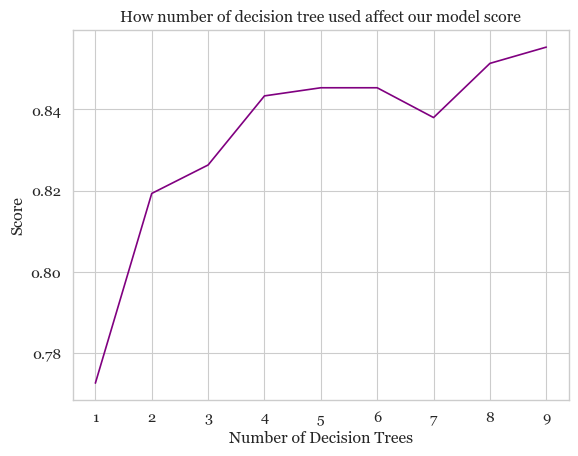

In [ ]:
plt.plot(range(1,10), score, color = 'purple')
plt.title('How number of decision tree used affect our model score')
plt.xlabel('Number of Decision Trees')
plt.ylabel('Score')
plt.show()

[EN] On the plot, we see a peak at around 8: 
* with the number of decision trees, which is equal to nine, our model achieves the highest accuracy.

[FR] Sur le tracé, on voit un pic vers 8 :
* avec le nombre d'arbres de décision, qui est égal à neuf, notre modèle atteint la plus grande précision.

In [ ]:
# building the model

model_rfc = RFC(n_estimators=9).fit(X_train, Y_train)

In [ ]:
# getting predictions

y_pred_rfc = model_rfc.predict(x_test)

In [ ]:
print('The results for Random Forest are', y_pred_rfc.mean())

The results for Random Forest are 0.15333333333333332


## Model evaluation

[EN]
* Here is the problem on using accuracy as a model performance measurement.

- There are two scenarios that should be considered and addressed:

1. First it can happen that the classifier predicted a customer would churn and they didn't.

2. Second the classifier can predicted a customer would stay within the business, so nothing was done, and in the end they churned.

Second scenario is bad, and that is the one we will try to avoid by minimizing the value.

[FR]
* Voici le problème de l'utilisation de la précision comme mesure de la performance d'un modèle.

- Deux scénarios doivent être envisagés et traités :

1. Tout d'abord, il peut arriver que le classificateur ait prédit qu'un client se désabonnerait et qu'il ne l'a pas fait.

2. Deuxièmement, le classificateur peut prédire qu'un client resterait dans l'entreprise, donc rien n'a été fait, et à la fin, ils ont abandonné.

Le deuxième scénario est mauvais, et c'est celui que nous essaierons d'éviter en minimisant la valeur.

_______________________________________________________________________________

[EN]
* Model evaluation in machine learning is the process of determining a model's performance via a metrics-driven analysis.

[FR]
* L'évaluation de modèle dans l'apprentissage automatique est le processus de détermination des performances d'un modèle via une analyse basée sur des métriques.


In [ ]:
#--Evaluation our model
from sklearn.metrics import classification_report, confusion_matrix

[EN]
* A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the total number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.
* The classification report is often used in machine learning to compute the accuracy of a classification model based on the values from the confusion matrix. 

[FR]
* Une matrice de confusion est une matrice N x N utilisée pour évaluer les performances d'un modèle de classification, où N est le nombre total de classes cibles. La matrice compare les valeurs cibles réelles avec celles prédites par le modèle d'apprentissage automatique.
* Le rapport de classification est souvent utilisé dans l'apprentissage automatique pour calculer la précision d'un modèle de classification basé sur les valeurs de la matrice de confusion.


In [ ]:
# Classification Report
print(f" Classification Report for Random Forests : \n\n {classification_report(y_test,y_pred_rfc)}" ,
      '\n\n',
       f"Classification Report for Decision Trees : \n\n {classification_report(y_test,y_pred)}")

 Classification Report for Random Forests : 

               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2379
           1       0.70      0.52      0.59       621

    accuracy                           0.85      3000
   macro avg       0.79      0.73      0.75      3000
weighted avg       0.84      0.85      0.84      3000
 

 Classification Report for Decision Trees : 

               precision    recall  f1-score   support

           0       0.88      0.86      0.87      2379
           1       0.51      0.56      0.53       621

    accuracy                           0.80      3000
   macro avg       0.69      0.71      0.70      3000
weighted avg       0.80      0.80      0.80      3000



[EN] Macro-averaged: all classes equally contribute to the final averaged metric. Weighted-averaged: each classes's contribution to the average is weighted by its size.

[FR] Macro-moyenne : toutes les classes contribuent de manière égale à la métrique moyenne finale. Moyenne pondérée : la contribution de chaque classe à la moyenne est pondérée par sa taille.

[EN] f1 score. The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation.

[FR] score f1. Le score F1 est une moyenne harmonique pondérée de précision et de rappel telle que le meilleur score est de 1,0 et le pire est de 0,0. De manière générale, les scores F1 sont inférieurs aux mesures de précision car ils intègrent la précision et le rappel dans leur calcul.

[EN] Precision is defined as the ratio of true positives to the sum of true and false positives. Recall is defined as the ratio of true positives to the sum of true positives and false negatives.

[FR] La précision est définie comme le rapport des vrais positifs à la somme des vrais et des faux positifs. Le rappel est défini comme le rapport des vrais positifs à la somme des vrais positifs et des faux négatifs.

[EN] Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

[FR] La prise en charge est le nombre d'occurrences réelles de la classe dans l'ensemble de données spécifié. Un soutien déséquilibré dans les données de formation peut indiquer des faiblesses structurelles dans les scores rapportés du classificateur et pourrait indiquer la nécessité d'un échantillonnage stratifié ou d'un rééquilibrage.

[EN] Recall is a measure of the classifier's completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives.

[FR] Le rappel est une mesure de l'exhaustivité du classificateur ; la capacité d'un classificateur à trouver correctement toutes les instances positives. Pour chaque classe, il est défini comme le rapport des vrais positifs à la somme des vrais positifs et des faux négatifs.

Text(48.91666666666667, 0.5, 'Predicted Value')

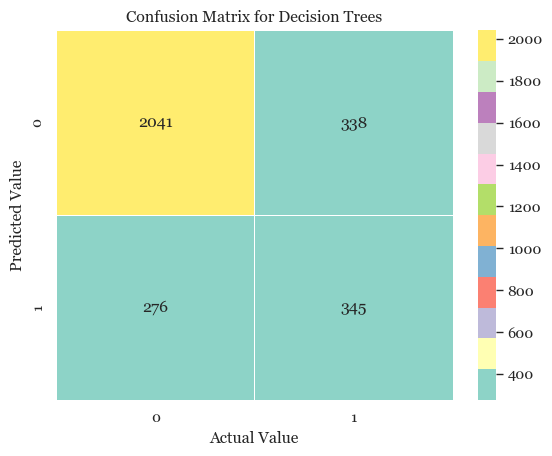

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), cmap = 'Set3', 
            linewidth = 0.5, annot = True, fmt= 'd')
plt.title('Confusion Matrix for Decision Trees')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

[EN]
* 2041 - True Negative
True Negative : the result is negative, the ML-prediction coincided with reality

* 276 - False Positive
False Positive : type 1 error, ML model predicted a positive result, but in fact it is negative

* 345 - True Positive
True Positive : the forecast coincided with reality, the result was positive, as predicted by the ML model

* 338 - False Negative : type 2 error - ML-model predicted a negative result, but in fact it is positive

[FR]
* 2041 - Vrai négatif
True Negative : le résultat est négatif, la prédiction ML a coïncidé avec la réalité

* 276 - Faux positif
Faux positif : erreur de type 1, le modèle ML a prédit un résultat positif, mais en fait il est négatif

* 345 - Vrai positif
True Positive : la prévision a coïncidé avec la réalité, le résultat était positif, comme prédit par le modèle ML

* 338 - Faux négatif : erreur de type 2 - Le modèle ML a prédit un résultat négatif, mais en fait il est positif

In [ ]:
confusion_rf = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_rf

Predicted,0,1,All
Actual,,,
0,2041,338,2379
1,276,345,621
All,2317,683,3000


Text(48.91666666666667, 0.5, 'Predicted Value')

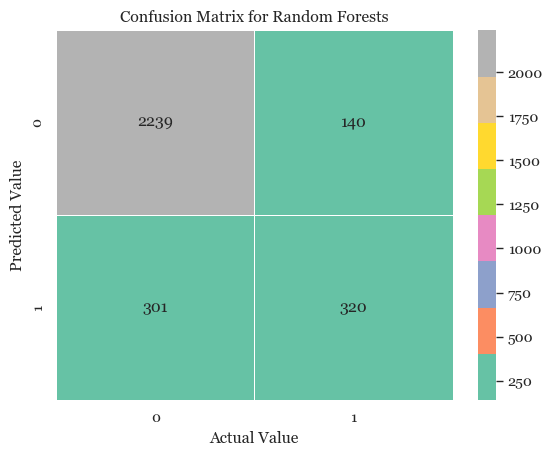

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_rfc), cmap = 'Set2', 
            linewidth = 0.5, annot = True, fmt= 'd')
plt.title('Confusion Matrix for Random Forests')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [ ]:
confusion_rf = pd.crosstab(y_test, y_pred_rfc, rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_rf

Predicted,0,1,All
Actual,,,
0,2239,140,2379
1,301,320,621
All,2540,460,3000


In [ ]:
confusion_rf = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_rf

Predicted,0,1,All
Actual,,,
0,2041,338,2379
1,276,345,621
All,2317,683,3000


[EN] Looking at both matrixes, we see:

- RFC predicts that
1. TP = 345 customers will definitely churn
2. TN = 2041 customers will definitely not churn
3. FN = 276 (predicted a negative result, but in fact it is positive)
4. FP = 338 (the model predicted a positive result, but in fact it is negative)

[FR]

En regardant les deux matrices, nous voyons :

- RFC prédit que
1. TP = 345 clients vont certainement se désabonner
2. TN = 2041 clients ne se désabonneront certainement pas
3. FN = 276 (prédit un résultat négatif, mais en fait il est positif)
4. FP = 338 (le modèle a prédit un résultat positif, mais en fait il est négatif)

[EN]
- DT predicts that
1. TP = 338 customers will definitely churn
2. TN = 2055 customers will definitely not churn
3. FN = 324 (predicted a negative result, but in fact it is positive)
4. FP = 283 (the model predicted a positive result, but in fact it is negative)

[FR]
- DT prédit que
1. TP = 338 clients vont certainement se désabonner
2. TN = 2055 clients ne se désabonneront certainement pas
3. FN = 324 (prédit un résultat négatif, mais en fait il est positif)
4. FP = 283 (le modèle a prédit un résultat positif, mais en fait il est négatif)

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=9, random_state=42)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [ ]:
clf_1 = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf_1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

[Text(0.582801686851211, 0.95, 'X[1] <= 42.5\ngini = 0.323\nsamples = 7000\nvalue = [5584, 1416]'),
 Text(0.3598075259515571, 0.85, 'X[4] <= 2.5\ngini = 0.209\nsamples = 4991\nvalue = [4398, 593]'),
 Text(0.25594723183391005, 0.75, 'X[4] <= 1.5\ngini = 0.188\nsamples = 4883\nvalue = [4371, 512]'),
 Text(0.1468425605536332, 0.65, 'X[9] <= 0.5\ngini = 0.28\nsamples = 2394\nvalue = [1991, 403]'),
 Text(0.0722318339100346, 0.55, 'X[3] <= 74197.941\ngini = 0.231\nsamples = 1828\nvalue = [1584, 244]'),
 Text(0.031141868512110725, 0.45, 'X[1] <= 41.5\ngini = 0.345\nsamples = 497\nvalue = [387, 110]'),
 Text(0.01730103806228374, 0.35, 'X[1] <= 30.5\ngini = 0.327\nsamples = 472\nvalue = [375, 97]'),
 Text(0.010380622837370242, 0.25, 'X[7] <= 197479.148\ngini = 0.184\nsamples = 117\nvalue = [105, 12]'),
 Text(0.006920415224913495, 0.15, 'X[0] <= 595.5\ngini = 0.159\nsamples = 115\nvalue = [105, 10]'),
 Text(0.0034602076124567475, 0.05, 'gini = 0.307\nsamples = 37\nvalue = [30, 7]'),
 Text(0.0103

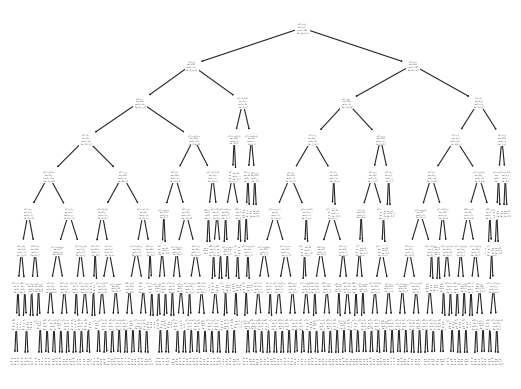

In [ ]:
tree.plot_tree(clf)

[Text(0.5, 0.875, 'X[1] <= 42.5\ngini = 0.323\nsamples = 7000\nvalue = [5584, 1416]'),
 Text(0.25, 0.625, 'X[4] <= 2.5\ngini = 0.209\nsamples = 4991\nvalue = [4398, 593]'),
 Text(0.125, 0.375, 'X[4] <= 1.5\ngini = 0.188\nsamples = 4883\nvalue = [4371, 512]'),
 Text(0.0625, 0.125, 'gini = 0.28\nsamples = 2394\nvalue = [1991, 403]'),
 Text(0.1875, 0.125, 'gini = 0.084\nsamples = 2489\nvalue = [2380, 109]'),
 Text(0.375, 0.375, 'X[3] <= 23194.08\ngini = 0.375\nsamples = 108\nvalue = [27, 81]'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 42\nvalue = [22, 20]'),
 Text(0.4375, 0.125, 'gini = 0.14\nsamples = 66\nvalue = [5, 61]'),
 Text(0.75, 0.625, 'X[6] <= 0.5\ngini = 0.484\nsamples = 2009\nvalue = [1186, 823]'),
 Text(0.625, 0.375, 'X[1] <= 50.5\ngini = 0.486\nsamples = 892\nvalue = [372, 520]'),
 Text(0.5625, 0.125, 'gini = 0.495\nsamples = 604\nvalue = [331, 273]'),
 Text(0.6875, 0.125, 'gini = 0.244\nsamples = 288\nvalue = [41, 247]'),
 Text(0.875, 0.375, 'X[4] <= 2.5\ngini = 0.395\n

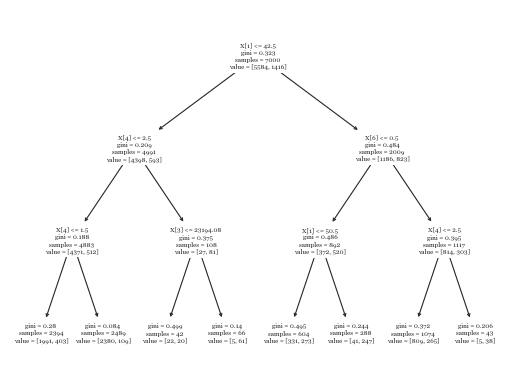

In [ ]:
tree.plot_tree(clf_1)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 42.50
|   |--- feature_4 <= 2.50
|   |   |--- feature_4 <= 1.50
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- feature_3 <= 74197.94
|   |   |   |   |   |--- feature_1 <= 41.50
|   |   |   |   |   |   |--- feature_1 <= 30.50
|   |   |   |   |   |   |   |--- feature_7 <= 197479.15
|   |   |   |   |   |   |   |   |--- feature_0 <= 595.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  595.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_7 >  197479.15
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  30.50
|   |   |   |   |   |   |   |--- feature_0 <= 408.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  408.00
|   |   |   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_11 >  0.50
|   |   |   | 

In [ ]:
text_representation = tree.export_text(clf_1)
print(text_representation)

|--- feature_1 <= 42.50
|   |--- feature_4 <= 2.50
|   |   |--- feature_4 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  1.50
|   |   |   |--- class: 0
|   |--- feature_4 >  2.50
|   |   |--- feature_3 <= 23194.08
|   |   |   |--- class: 0
|   |   |--- feature_3 >  23194.08
|   |   |   |--- class: 1
|--- feature_1 >  42.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_1 <= 50.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  50.50
|   |   |   |--- class: 1
|   |--- feature_6 >  0.50
|   |   |--- feature_4 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  2.50
|   |   |   |--- class: 1



In [ ]:
from sklearn import datasets,tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

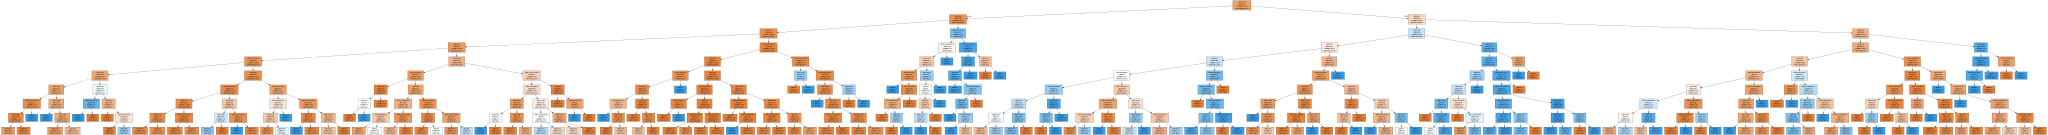

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

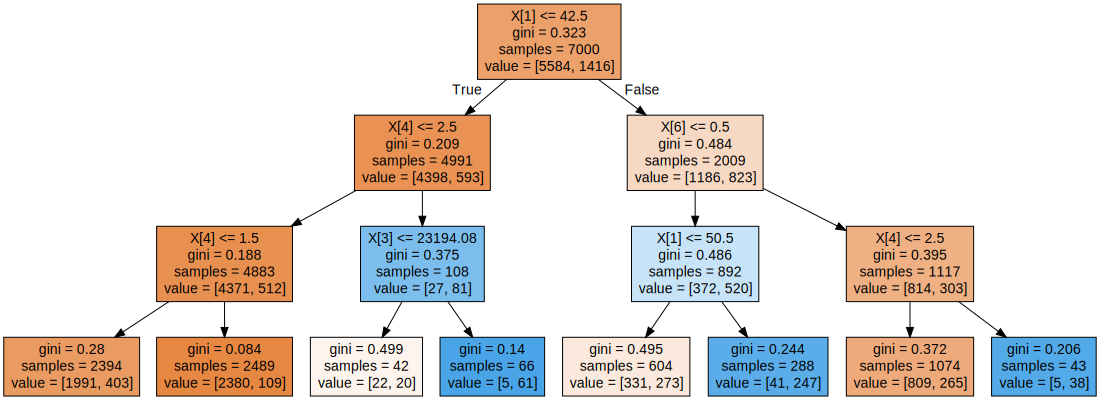

In [ ]:
dot_data = tree.export_graphviz(clf_1, out_file=None, filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

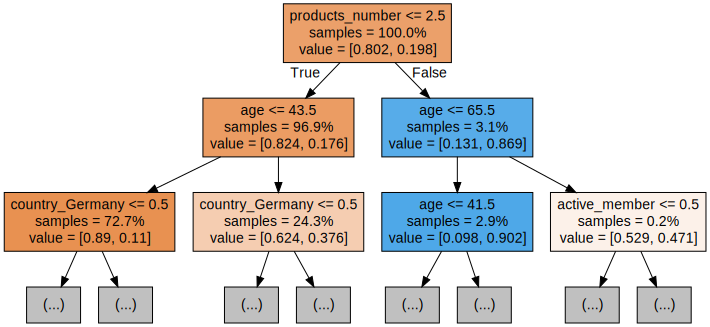

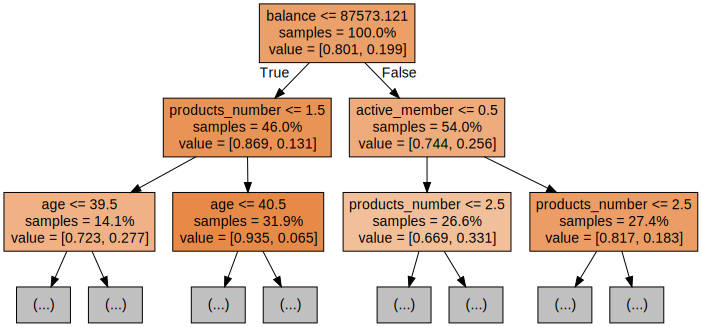

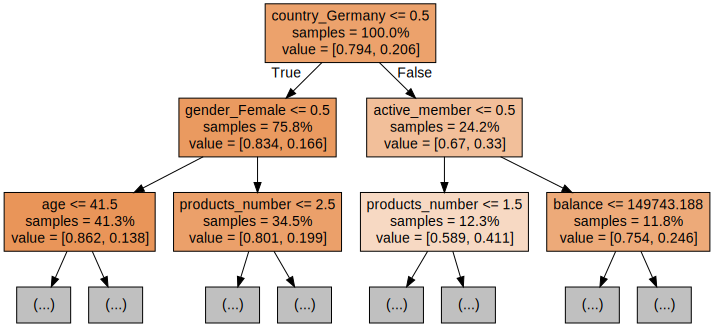

In [ ]:
for i in range(3):
    tree = model_rfc.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)